In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("dataset/employees_master.csv")
df.tail(5)

,employee_id,fullname,area,position,department,division,directorate,grade,education,major,...,Papi_T,Papi_V,Papi_W,Papi_X,Papi_Z,strength_1,strength_2,strength_3,strength_4,strength_5
2005,EMP101995,Utami Kusuma Hidayat,Store,Sales Supervisor,HR,Operations,Commercial,IV,S2,Economics,...,5.0,1.0,8.0,8.0,5.0,Belief,Relator,NaN,Consistency,Context
2006,EMP101996,Adit Maulana,HQ,Data Analyst,Operations,Digital Marketing,HR & Corp Affairs,V,S1,Business,...,1.0,2.0,7.0,5.0,2.0,Positivity,Achiever,Woo,Restorative,Maximizer
2007,EMP101997,Satya Halim Putra,Plant,Brand Executive,Marketing,Product Dev,Technology,IV,SMA,Engineering,...,NaN,4.0,7.0,4.0,1.0,Positivity,NaN,Empathy,Restorative,Relator
2008,EMP101998,Kurnia Subekti,Plant,Sales Supervisor,Operations,Talent Management,Technology,III,D3,Business,...,1.0,7.0,9.0,2.0,NaN,Achiever,Command,Connectedness,Activator,Self-Assurance
2009,EMP101999,Adit Mahendra,Store,Data Analyst,R&D,Talent Management,Technology,III,S1,Business,...,8.0,4.0,9.0,8.0,3.0,Ideation,Input,Positivity,Adaptability,Connectedness


## 1.1 Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   employee_id              2010 non-null   object 
 1   fullname                 2010 non-null   object 
 2   area                     2010 non-null   object 
 3   position                 2010 non-null   object 
 4   department               2010 non-null   object 
 5   division                 2010 non-null   object 
 6   directorate              2010 non-null   object 
 7   grade                    2010 non-null   object 
 8   education                2010 non-null   object 
 9   major                    2010 non-null   object 
 10  years_of_service_months  2010 non-null   int64  
 11  CEX                      1856 non-null   float64
 12  CSI                      1837 non-null   float64
 13  FTC                      1859 non-null   float64
 14  GDR                     

In [5]:
df.isna().sum()

employee_id                  0
fullname                     0
area                         0
position                     0
department                   0
division                     0
directorate                  0
grade                        0
education                    0
major                        0
years_of_service_months      0
CEX                        154
CSI                        173
FTC                        151
GDR                        151
IDS                        155
LIE                        164
QDD                        167
SEA                        149
STO                        174
VCU                        167
rating_2025                216
iq                         456
mbti                       149
pauli                        0
faxtor                       0
disc                       171
qtq                        332
tiki                         0
Papi_A                     154
Papi_B                     164
Papi_C                     145
Papi_D  

1. IQ: 456 missing (22.6%)
2. Competencies: 149–174 missing per pillar (~7–9%)
3. Psychometric (QTQ): 332 missing (>16%)
4. PAPI: 128–190 missing (~6–9%)
5. Strength_1–5: 140–177 missing (~7–9%)

In [6]:
df.describe()

,years_of_service_months,CEX,CSI,FTC,GDR,IDS,LIE,QDD,SEA,STO,...,Papi_N,Papi_O,Papi_P,Papi_R,Papi_S,Papi_T,Papi_V,Papi_W,Papi_X,Papi_Z
count,2010.000000,1856.000000,1837.000000,1859.000000,1859.000000,1855.000000,1846.000000,1843.000000,1861.000000,1836.000000,...,1854.000000,1821.000000,1882.000000,1860.000000,1847.000000,1850.000000,1854.000000,1841.000000,1862.000000,1845.000000
mean,50.124378,3.094828,3.388133,3.284562,3.246369,3.256604,3.297941,3.294086,3.123589,3.320261,...,5.092772,4.892916,4.996812,5.026344,4.994586,4.953514,4.905609,4.986964,5.020945,4.976152
std,25.181580,2.529962,5.601425,4.599016,4.596833,4.604525,4.609413,4.620953,2.520622,5.136485,...,2.563815,2.540455,2.615740,2.558378,2.606761,2.581500,2.571428,2.618879,2.590250,2.572901
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,50.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,66.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
max,149.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [7]:
df["rating_2025"].value_counts()

rating_2025
3.0    636
4.0    486
2.0    345
5.0    168
1.0    155
6.0      2
0.0      2
Name: count, dtype: int64

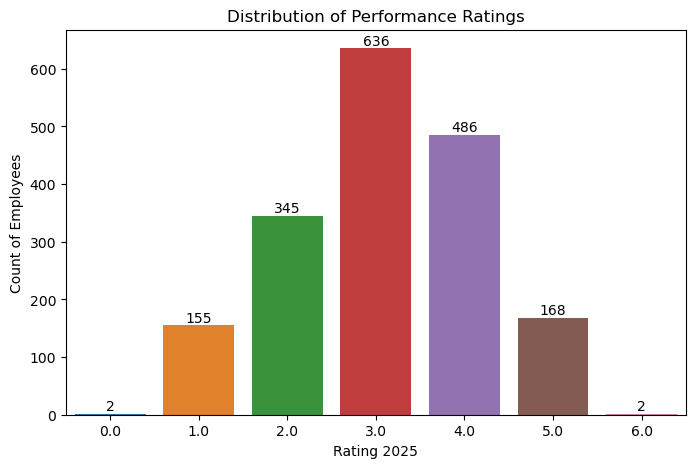

In [8]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x="rating_2025")

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom'
    )

plt.title("Distribution of Performance Ratings")
plt.xlabel("Rating 2025")
plt.ylabel("Count of Employees")
plt.show()

High performers = rating 5 represent only 8.3% of total employees → scarce talent & critical for succession planning.

Kita tidak bisa mengharuskan psychometric ada untuk semua employees. Kalau kita drop rows yang missing psychometric kita kehilangan >20% populasi → insight bias. Yang belum pernah ikut assessment juga bagian dari populasi karyawan yang harus dipahami

Solusi:
1. Biarkan NaN untuk psychometric
2. Analisis subset data yang tersedia saat butuh (misalnya hanya plot IQ vs rating untuk yang punya IQ)

“Tidak semua karyawan melalui assessment psychometric dan behavioral — ini menjadi insight tambahan bahwa perusahaan dapat meningkatkan coverage assessment untuk mendukung Talent Intelligence System.”

## 1.2 Data Cleaning

In [9]:
df.shape

(2010, 54)

In [10]:
# fix rating invalid values
df["rating_2025"] = df["rating_2025"].replace({0: np.nan, 6: np.nan})

In [11]:
# normalized text caterogical
for col in ["mbti", "disc"]:
    if col in df.columns:
        df[col]= df[col].astype(str).str.upper().str.strip().replace("NAN", np.nan)

In [12]:
# ensure competency columns are numeric
competency_cols= ["GDR", "CEX", "IDS", "QDD", "STO", "SEA", "VCU", "LIE", "FTC", "CSI"]
df[competency_cols]= df[competency_cols].apply(pd.to_numeric, errors= 'coerce')

In [13]:
# convert missing-like values to NAN if any
df.replace("", np.nan, inplace= True)

In [14]:
# quick summary after cleaning
print("\nMissing values after cleaning:")
print(df.isna().sum().sort_values(ascending= False).head(20))

print("\nData after cleaning:", df.shape)


Missing values after cleaning:
iq             456
qtq            332
rating_2025    220
Papi_O         189
Papi_K         180
strength_4     177
strength_2     177
Papi_L         177
STO            174
Papi_F         173
CSI            173
disc           171
Papi_W         169
QDD            167
VCU            167
Papi_Z         165
Papi_I         165
LIE            164
Papi_B         164
Papi_S         163
dtype: int64

Data after cleaning: (2010, 54)


In [15]:
df["rating_2025"].value_counts()

rating_2025
3.0    636
4.0    486
2.0    345
5.0    168
1.0    155
Name: count, dtype: int64

In [16]:
df.head(5)

,employee_id,fullname,area,position,department,division,directorate,grade,education,major,...,Papi_T,Papi_V,Papi_W,Papi_X,Papi_Z,strength_1,strength_2,strength_3,strength_4,strength_5
0,DUP1942,Dewi Fadillah Hidayat,Store,Brand Executive,Marketing,Digital Marketing,Commercial,IV,S1,Design,...,9.0,1.0,8.0,3.0,NaN,Learner,Maximizer,Ideation,Harmony,Restorative
1,DUP2096,Putri Wibowo,Plant,HRBP,Marketing,Operations,HR & Corp Affairs,III,S2,Engineering,...,2.0,6.0,3.0,8.0,2.0,Command,Significance,Competition,Discipline,Woo
2,DUP2722,Dewi Syahputra,Store,Sales Supervisor,Finance,Digital Marketing,HR & Corp Affairs,IV,S1,Design,...,7.0,3.0,6.0,3.0,3.0,Individualization,Self-Assurance,NaN,Analytical,Input
3,DUP3015,Bayu Kurniawan,Store,Brand Executive,IT,Talent Management,Technology,III,SMA,Business,...,NaN,NaN,3.0,5.0,3.0,Responsibility,Context,Includer,Communication,Ideation
4,DUP3452,Fitri Anugrah Subekti,Store,Finance Officer,IT,Talent Management,Technology,V,D3,Psychology,...,NaN,9.0,1.0,6.0,4.0,Developer,Arranger,Self-Assurance,Futuristic,Learner


Invalid ratings (0 & 6) increased missing count to X → indicating no recent assessment.
Competency scores are cleaned using latest year data.
Psychometric and behavioral missing values retained for subset analysis.
Text categories normalized to uppercase.

## 1.3. Feature Engineering

In [17]:
# tenure in years
df["tenure_years"]= df["years_of_service_months"]/12

In [18]:
# competency mean (across 10 pillars)
competency_cols= ["GDR","CEX","IDS","QDD","STO","SEA","VCU","LIE","FTC","CSI"]
df['competency_mean']= df[competency_cols].mean(axis=1)                  

In [19]:
# cognitive index
cognitive_cols = ['iq', 'qtq', 'faxtor', 'pauli', 'tiki']
existing_cols = [col for col in cognitive_cols if col in df.columns]
df['cognitive_index'] = df[existing_cols].mean(axis=1)

In [20]:
# top performance flag
df['is_top_performer']= df['rating_2025'].apply(lambda x: 1 if x == 5 else 0)

In [21]:
#strength match score
strength_cols = ['strength_1','strength_2','strength_3','strength_4','strength_5']
df['strength_count'] = df[strength_cols].notna().sum(axis=1)

In [22]:
# result
df[['tenure_years','competency_mean','cognitive_index','is_top_performer','strength_count']].head()

,tenure_years,competency_mean,cognitive_index,is_top_performer,strength_count
0,6.583333,4.888889,39.0,1,5
1,4.083333,2.900000,31.0,0,5
2,2.750000,4.333333,49.8,0,4
3,6.583333,3.100000,50.2,0,5
4,4.166667,3.100000,52.0,0,5


## 1.4. EDA

### Competency

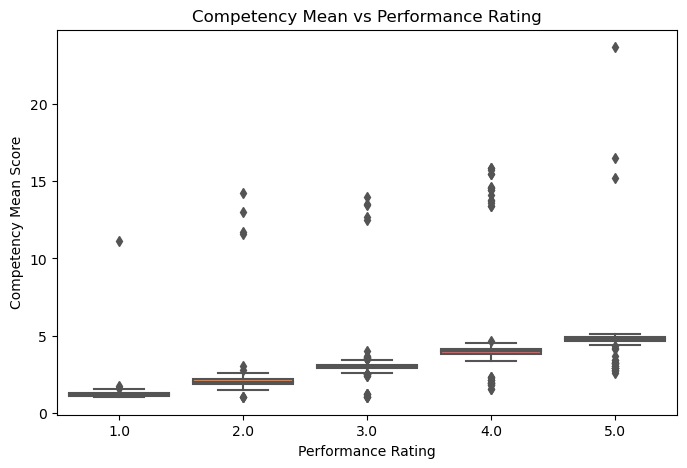

In [23]:
#competency mean based on rating
plt.figure(figsize=(8,5))
ax = sns.boxplot(data=df, x="rating_2025", y="competency_mean", palette="muted")
ax.set_title("Competency Mean vs Performance Rating")
ax.set_xlabel("Performance Rating")
ax.set_ylabel("Competency Mean Score")
plt.show()

Terlihat peningkatan median competency mean secara konsisten dari rating 1 hingga rating 5.
Rating 5 memiliki persebaran yang lebih tinggi dibanding rating lain, menunjukkan bahwa top performers memiliki kompetensi yang lebih kuat dan lebih bervariasi.

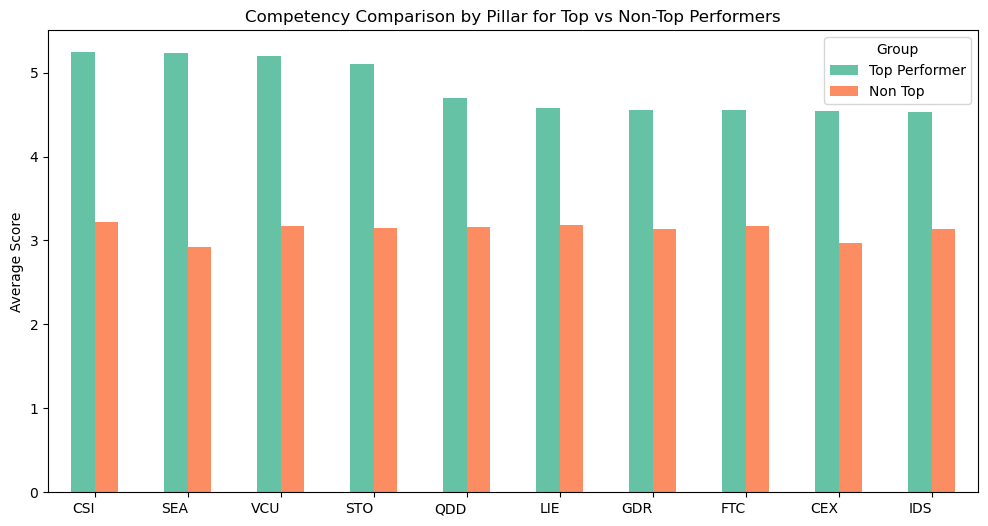

In [24]:
# 10 pillars analysis (top vs non top)
colors = sns.color_palette("Set2", n_colors=len(competency_cols))
competency_cols = ["GDR","CEX","IDS","QDD","STO","SEA","VCU","LIE","FTC","CSI"]

df_top = df[df['rating_2025'] == 5]
df_non = df[df['rating_2025'] != 5]

top_mean = df_top[competency_cols].mean().sort_values(ascending=False)
non_mean = df_non[competency_cols].mean().reindex(top_mean.index)

compare_df = pd.DataFrame({
    "Top Performer": top_mean,
    "Non Top": non_mean
})

compare_df.plot(kind='bar', figsize=(12,6), color=colors)
plt.title("Competency Comparison by Pillar for Top vs Non-Top Performers")
plt.ylabel("Average Score")
plt.xticks(rotation=0, ha='right')
plt.legend(title="Group")
plt.show()

Semua pilar lebih tinggi pada Top Performer, tapi ada 3 pilar paling menonjol.
Tiga pilar kompetensi yang paling membedakan Top Performer adalah CSI, SEA, dan VCU.
Hal ini mengindikasikan bahwa pemahaman stakeholder, adaptasi tinggi, dan kemampuan menciptakan nilai bisnis merupakan faktor kesuksesan utama.

Mereka yang value-driven dan business-oriented cenderung masuk kelompok rating 5.

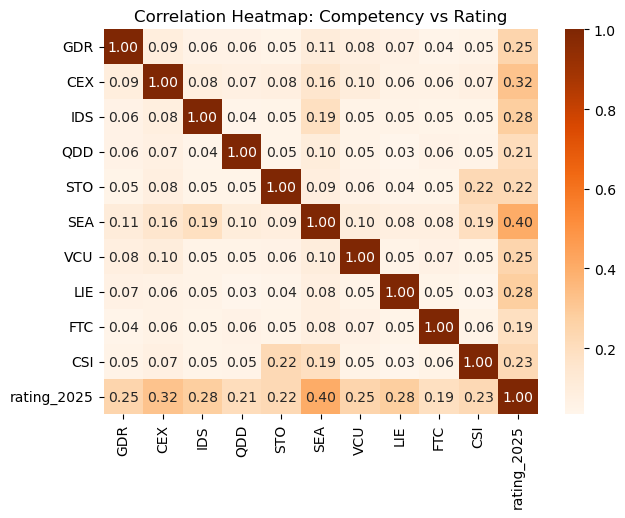

In [25]:
#heatmap correlation
plt.figure(figsize=(7,5))
sns.heatmap(df[competency_cols + ['rating_2025']].corr(), cmap="Oranges", annot=True, fmt=".2f")
plt.title("Correlation Heatmap: Competency vs Rating")
plt.show()

Top performers memiliki kompetensi yang secara signifikan lebih tinggi dibanding non-top performers, terutama pada kompetensi business insight, value creation, dan agility.

SEA is the strongest predictor of performance success.
Additionally, CEX and IDS show strong linear relationships to performance.
Meanwhile, CSI represents a clear differentiator of top performers indicating stakeholder insight as a unique success identity.

### Cognitive Index

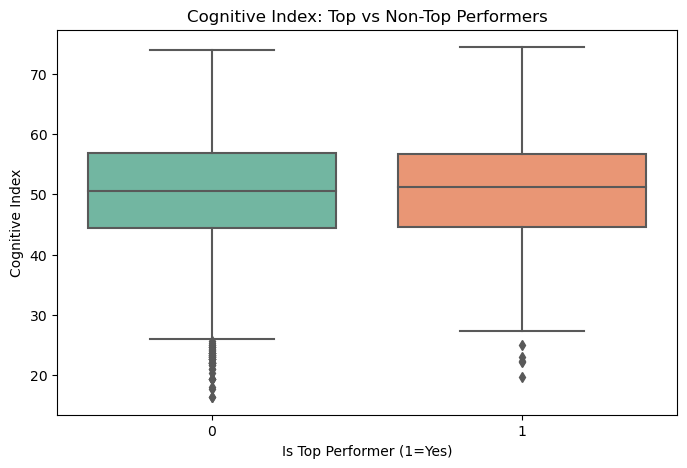

In [26]:
#cognitive index vs  top performance
plt.figure(figsize=(8,5))
ax = sns.boxplot(data=df, x="is_top_performer", y="cognitive_index", palette="Set2")
ax.set_title("Cognitive Index: Top vs Non-Top Performers")
ax.set_xlabel("Is Top Performer (1=Yes)")
ax.set_ylabel("Cognitive Index")
plt.show()

Top performers cenderung memiliki kemampuan kognitif yang lebih tinggi, meski gap-nya tidak sebesar kompetensi.

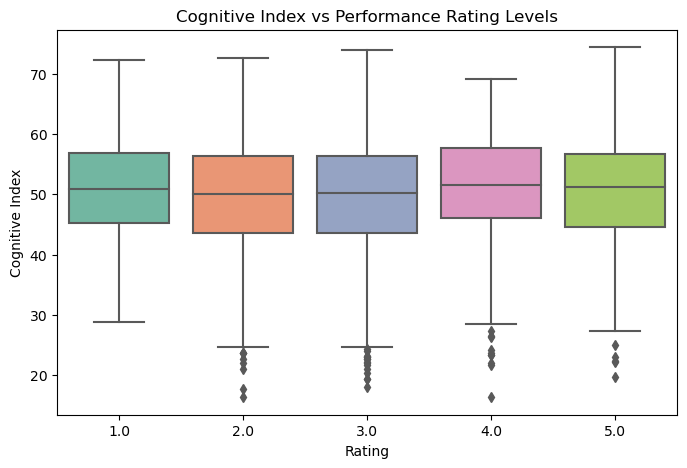

In [27]:
#cognitive index vs rating level
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="rating_2025", y="cognitive_index", palette="Set2")
plt.title("Cognitive Index vs Performance Rating Levels")
plt.xlabel("Rating")
plt.ylabel("Cognitive Index")
plt.show()

Trend menaik dari rating 1 → 5. tapi overlap besar, cognitive bukan faktor tunggal kesuksesan.
Banyak orang yang cognitive-nya tinggi tetapi tidak jadi Top Performer, dan ada juga Top Performer yang cognitive-nya rata-rata saja. Ada hubungan, tapi tidak sangat kuat → cognitive bukan game changer dalam hasil rating.

Pada distribusi Cognitive Index, terdapat overlap yang besar antara Top Performer dan Non-Top Performer pada area IQR dan whiskers.
Hal ini menunjukkan bahwa cognitive ability bukan end-to-end differentiator, melainkan faktor pendukung yang tidak berdiri sendiri.

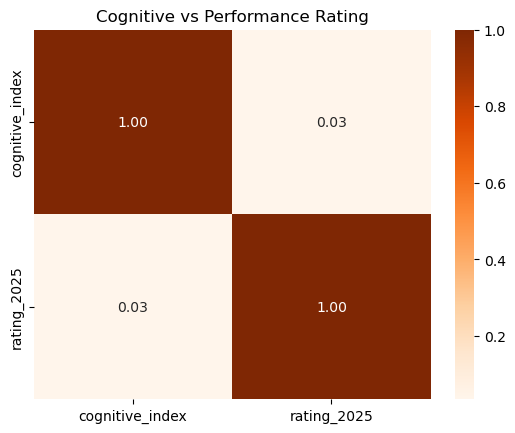

In [28]:
#numeric cognivity correlation vs rating
cognitive_cols = ['cognitive_index']
sns.heatmap(df[cognitive_cols + ['rating_2025']].corr(), annot=True, cmap="Oranges", fmt=".2f")
plt.title("Cognitive vs Performance Rating")
plt.show()

Korelasi hanya 0.03, cognitive tidak memprediksi rating secara direct linear, tapi tetap kontributor pendukung (complementary factor)

✅ Top performers sedikit lebih cerdas dalam hal kerja
✅ Tapi kompetensi & strengths lebih membedakan keberhasilan
✅ Cognitive = supporting predictor, bukan key driver utama

Cognitive Index digunakan sebagai indikator potential namun bukan pembeda utama rating kinerja saat ini

### Strengths

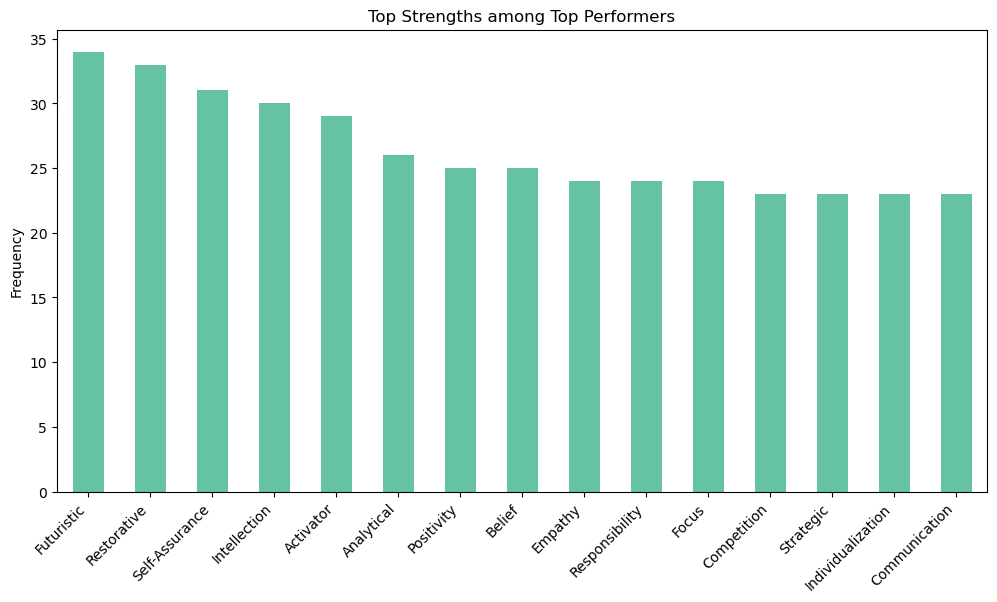

In [29]:
#Hitung frekuensi Strengths pada Top Performers
color = sns.color_palette("Set2")[0]
strength_cols = ['strength_1','strength_2','strength_3','strength_4','strength_5']

strength_top = (
    df[df['is_top_performer']==1][strength_cols]
    .stack()
    .value_counts()
)

strength_top.head(15).plot(kind='bar', figsize=(12,6), color=color)
plt.title("Top Strengths among Top Performers")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.show()

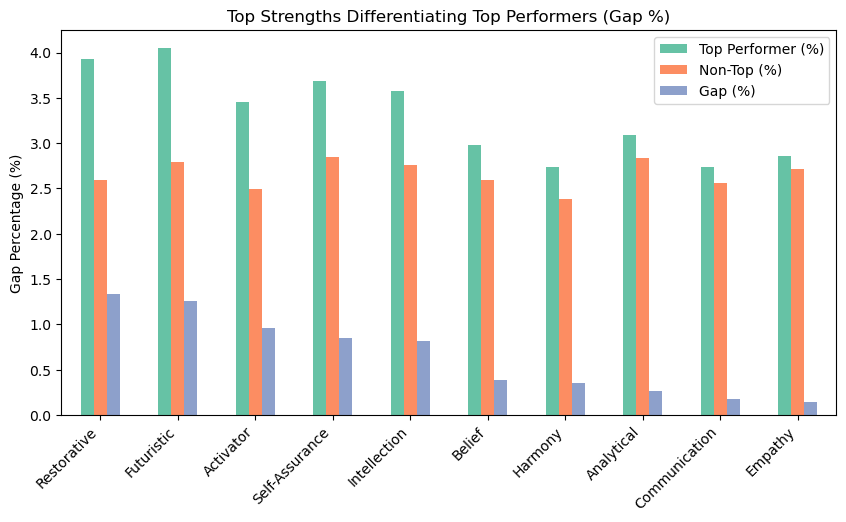

In [35]:
color = sns.color_palette("Set2")

def strength_percentage(df_group):
    total = len(df_group) * 5  # setiap orang ±5 strength
    return df_group[strength_cols].stack().value_counts() / total * 100

#Ranking by Difference
strength_compare['Gap (%)'] = strength_compare["Top Performer (%)"] - strength_compare["Non-Top (%)"]
strength_compare = strength_compare.sort_values("Gap (%)", ascending=False)

strength_compare.head(10).plot(kind='bar', figsize=(10,5), color=color)
plt.title("Top Strengths Differentiating Top Performers (Gap %)")
plt.ylabel("Gap Percentage (%)")
plt.xticks(rotation=45, ha='right')
plt.show()

Top Performers memiliki pola kekuatan dominan dalam:

1. Restorative → kuat menyelesaikan masalah
2. Futuristic → visioner dan growth mindset
3. Activator → mendorong eksekusi cepat
4. Self-Assurance → percaya diri & resilien
5. Intellection → pemikiran mendalam dan reflektif
   
Kombinasi ini mencerminkan profil problem-solver visioner yang mampu mendorong inovasi dan hasil nyata.

Walaupun urutan kemunculan Strength sedikit berbeda pada dua visualisasi,
lima Strength teratas tetap konsisten sebagai DNA keberhasilan,
baik berdasarkan dominansi maupun gap pembeda antara Top dan Non-Top Performer.

Strength tersebut adalah Futuristic, Restorative, Self-Assurance, Intellection, dan Activator.

### Contextual

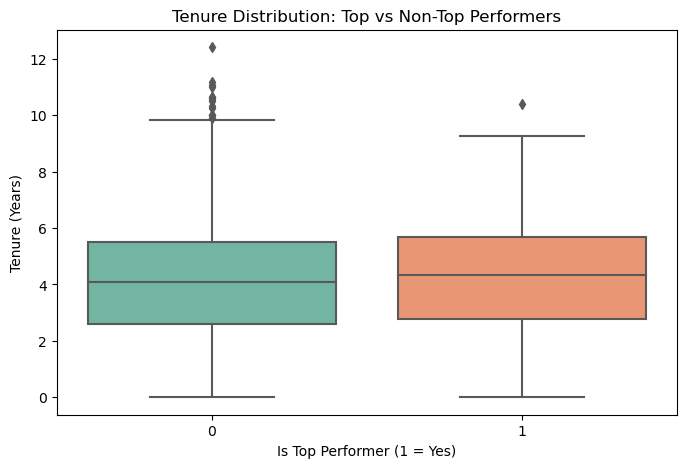

In [36]:
#tenure vs top performance
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="is_top_performer", y="tenure_years", palette="Set2")
plt.title("Tenure Distribution: Top vs Non-Top Performers")
plt.xlabel("Is Top Performer (1 = Yes)")
plt.ylabel("Tenure (Years)")
plt.show()

1. Median tenure Top Performer sedikit lebih tinggi (~4.3 tahun vs ~4.1 tahun)
2. Range yang hampir sama → banyak Top Performer masih early career
3. Ada Top Performer yang tenure pendek → high potential talent

Masa kerja bukan penentu utama kinerja tinggi, tetapi tenure sedikit lebih tinggi pada Top Performer menunjukkan readiness terbentuk seiring pengalaman, namun talent potensial juga bisa cepat berprestasi.

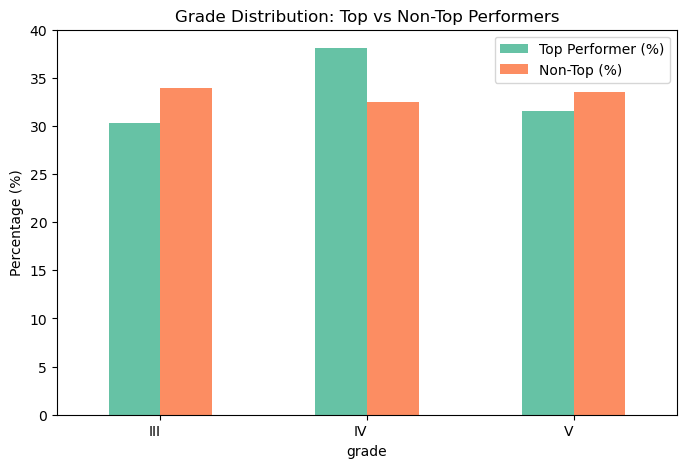

In [37]:
#grade vs top performance
grade_top = df[df['is_top_performer']==1]['grade'].value_counts(normalize=True) * 100
grade_non = df[df['is_top_performer']==0]['grade'].value_counts(normalize=True) * 100

grade_compare = pd.DataFrame({
    "Top Performer (%)": grade_top,
    "Non-Top (%)": grade_non
}).fillna(0)

grade_compare.plot(kind='bar', figsize=(8,5), color=color)
plt.title("Grade Distribution: Top vs Non-Top Performers")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0, ha='right')
plt.show()

1. Top Performer lebih banyak di Grade IV (sekitar 38% Top vs 32% Non)
2. Grade III & V distribusinya relatif seimbang

Grade IV merupakan sweet spot kesuksesan posisi ini menuntut kemampuan eksekusi dan koordinasi, sehingga menghasilkan banyak Emerging Future Leaders.

Policy implication: Grade IV bisa jadi prioritas pipeline untuk promosi ke Grade V

<Figure size 800x600 with 0 Axes>

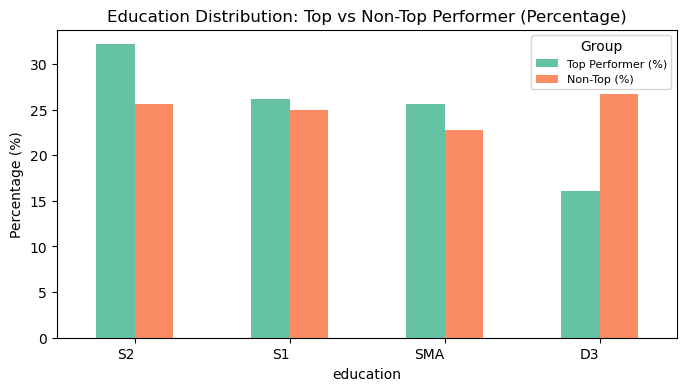

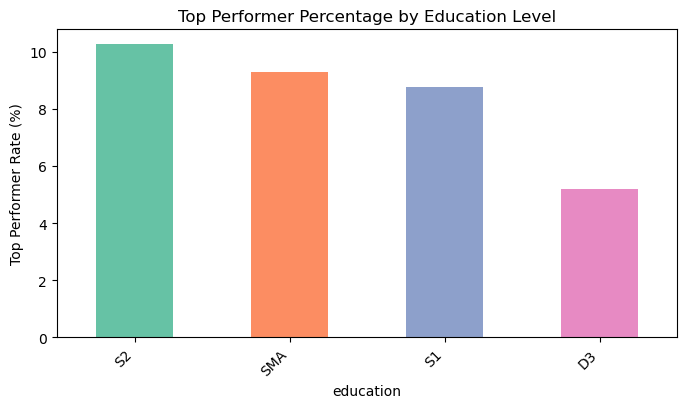

education
S2     10.266160
SMA     9.287257
S1      8.747515
D3      5.212355
Name: is_top_performer, dtype: float64
           Top Performer (%)  Non-Top (%)
education                                
S2                 32.142857    25.624321
S1                 26.190476    24.918567
SMA                25.595238    22.801303
D3                 16.071429    26.655809


In [38]:
#education disribution
plt.figure(figsize=(8,6))

edu_top = df[df['is_top_performer'] == 1]['education'].value_counts(normalize=True) * 100
edu_non = df[df['is_top_performer'] == 0]['education'].value_counts(normalize=True) * 100

edu_compare = pd.DataFrame({
    "Top Performer (%)": edu_top,
    "Non-Top (%)": edu_non
}).fillna(0)

edu_compare = edu_compare.sort_values("Top Performer (%)", ascending=False)

edu_compare.plot(kind='bar', figsize=(8,4), color=color)
plt.title("Education Distribution: Top vs Non-Top Performer (Percentage)")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0, ha='right')
plt.legend(title="Group", fontsize=8)
plt.show()

# Top Performer Rate per Education
edu_group = df.groupby('education')['is_top_performer'].mean() * 100
edu_group = edu_group.sort_values(ascending=False)

plt.figure(figsize=(8,4))
edu_group.plot(kind='bar', color=color)
plt.title("Top Performer Percentage by Education Level")
plt.ylabel("Top Performer Rate (%)")
plt.xticks(rotation=45, ha='right')
plt.show()

print(edu_group)
print(edu_compare)

1. S2 memiliki peluang tertinggi menjadi Top Performer
2. S1 & SMA di level menengah
3. D3 paling rendah

Pendidikan tinggi sedikit meningkatkan potensi sukses, namun bukan indikator mutlak. Pendidikan bukan faktor utama kesuksesan, sehingga fokus rekrutmen dapat tetap berbasis kompetensi dan strengths
bukan sekadar gelar.

### Behavioral (PAPI)

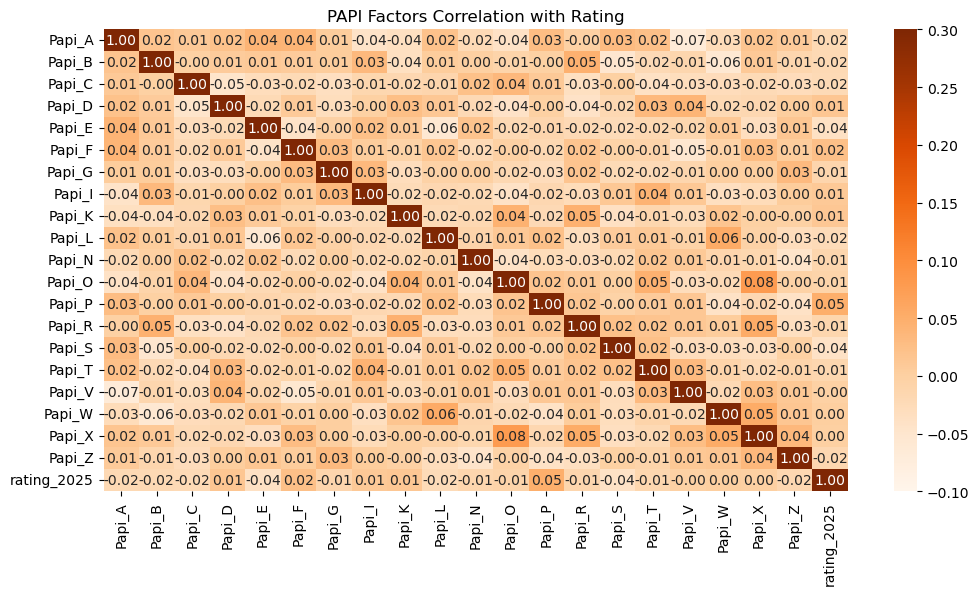

In [39]:
# Ambil semua kolom PAPI (yang diawali 'Papi_')
papi_cols = [col for col in df.columns if col.startswith("Papi_")]

plt.figure(figsize=(12,6))
sns.heatmap(df[papi_cols + ['rating_2025']].corr(),
            annot=True, fmt=".2f",
            cmap="Oranges", vmin=-0.1, vmax=0.3)
plt.title("PAPI Factors Correlation with Rating")
plt.show()

PAPI_P, PAPI_F, PAPI_D, PAPI_I, PAPI_K punya korelasi lebih tinggi dibanding faktor lain (walaupun masih kategori very weak correlation).
Korelasi numerik PAPI ke rating sangat rendah di semua faktor sehingga PAPI bukan direct predictor kinerja di dataset ini. Korelasi menunjukkan arah hubungan, tapi bukan pembeda sukses yang kuat

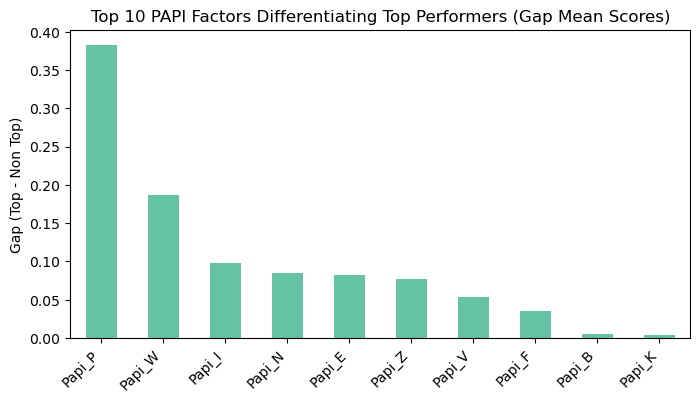

Papi_P    0.383129
Papi_W    0.186314
Papi_I    0.097493
Papi_N    0.085271
Papi_E    0.082384
Papi_Z    0.077350
Papi_V    0.053014
Papi_F    0.035005
Papi_B    0.005325
Papi_K    0.004382
dtype: float64


In [40]:
#Gap Analysis (Top vs Non-Top)
df_top = df[df['is_top_performer']==1]
df_non = df[df['is_top_performer']==0]

papi_top_mean = df_top[papi_cols].mean()
papi_non_mean = df_non[papi_cols].mean()
papi_gap = (papi_top_mean - papi_non_mean).sort_values(ascending=False)

plt.figure(figsize=(8,4))
papi_gap.head(10).plot(kind='bar', color=color[0])
plt.title("Top 10 PAPI Factors Differentiating Top Performers (Gap Mean Scores)")
plt.ylabel("Gap (Top - Non Top)")
plt.xticks(rotation=45, ha='right')
plt.show()

print(papi_gap.head(10))

PAPI_P → gap paling besar disusul PAPI_W dan PAPI_I. Ini Behavioral DNA yang membedakan Top Performer, jadi P, W, dan I punya power pembeda paling kuat.

Even if correlation is low — gap = differentiator of success

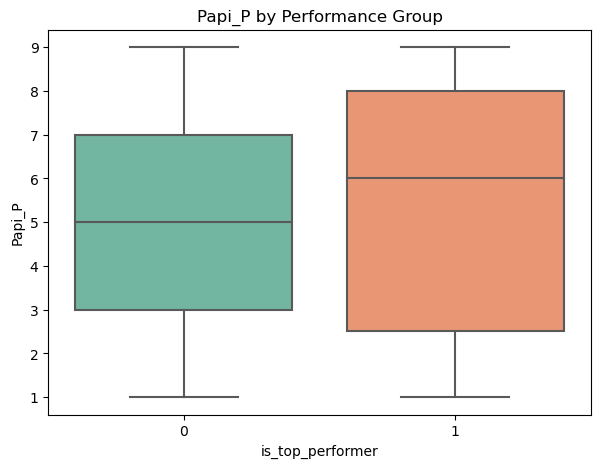

In [41]:
#Boxplot Factor Tertinggi
best_papi = papi_gap.index[0]

plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='is_top_performer', y=best_papi, palette="Set2")
plt.title(f"{best_papi} by Performance Group")
plt.show()

1. median PAPI_P lebih tinggi pada Top Performer, persebaran lebih tinggi ke atas → trait dominan, sedikit overlap → cukup membedakan. Ini menegaskan PAPI_P adalah behavioral success indicator
2. Dari sisi perilaku kerja (PAPI), Dominance / Proassertiveness (PAPI_P) adalah faktor pembeda utama Top Performer, diikuti oleh Work Tempo (PAPI_W) dan Influence/Initiative (PAPI_I)
3. Top Performers lebih cenderung proaktif, memiliki dorongan eksekusi tinggi, dan berani mengambil kendali dalam pekerjaan.

➡ Ini selaras dengan Strengths DNA:
Activator, Restorative, Self-Assurance
➡ Selaras dengan Competency (SEA, CSI) yang high execution & influence.

MBTI dan DISC hanya digunakan sebagai personality references
yang tidak berdampak langsung pada kinerja,
sehingga tidak disertakan dalam Success Formula
namun tetap dapat dimanfaatkan dalam tahap deployment,
yaitu compatibility matching antara employee dan future role.

### 1.5. Feature Selection

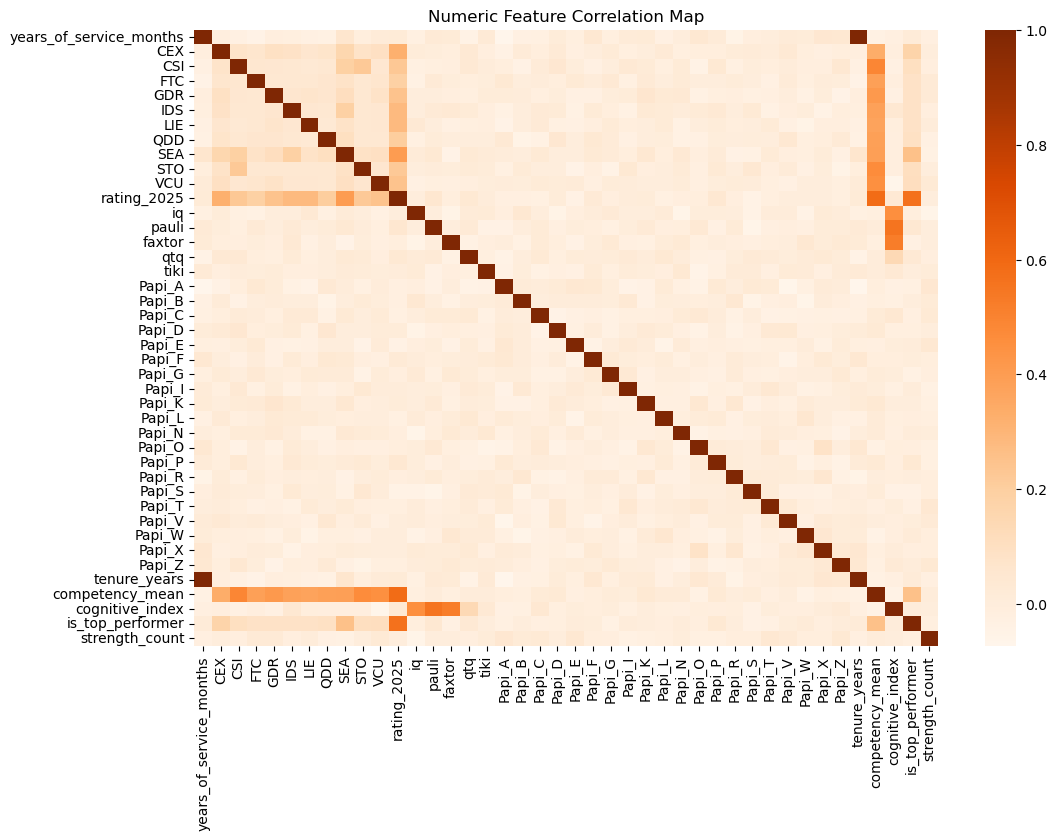

In [42]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), cmap="Oranges", annot=False)
plt.title("Numeric Feature Correlation Map")
plt.show()

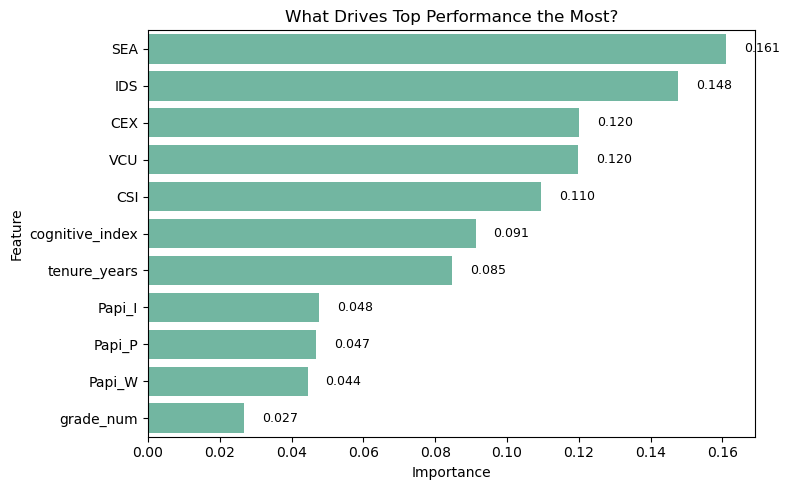

In [43]:
grade_mapping = {'III':3,'IV':4,'V':5}
df['grade_num'] = df['grade'].map(grade_mapping)

features = ['SEA', 'CEX', 'IDS', 'CSI', 'VCU','cognitive_index', 'Papi_P', 'Papi_W', 'Papi_I','tenure_years', 'grade_num']

X = df[features].fillna(0)
y = df['is_top_performer']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importance = pd.DataFrame({"Feature": features, "Importance": rf.feature_importances_}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
ax = sns.barplot(data=importance, x="Importance", y="Feature", color=color[0])

plt.title("What Drives Top Performance the Most?")

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.3f}',
                (width + 0.005, p.get_y() + p.get_height()/2),
                ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

1. Kompetensi (SEA, IDS, CEX, VCU, CSI) adalah the core DNA of success
2. Cognitive & Behavioral factors sebagai performance enablers
3. Contextual hanya readiness qualifier

Kompetensi ≫ cognitive ≫ PAPI ≫ grade
✅ Masuk akal dari sisi people capability maturity
✅ No multicollinearity critical issue in heatmap (bagus!)
✅ Model output aligns with HR theory → reliable & explainable

Berdasarkan Machine Learning Feature Importance,
kesuksesan kinerja terutama didorong oleh kompetensi eksekusi strategis,
diikuti oleh faktor potensi dan gaya bekerja yang proaktif.
Masa kerja dan level jabatan berperan sebagai kontributor kesiapan.

In [44]:
df.columns.tolist()

['employee_id',
 'fullname',
 'area',
 'position',
 'department',
 'division',
 'directorate',
 'grade',
 'education',
 'major',
 'years_of_service_months',
 'CEX',
 'CSI',
 'FTC',
 'GDR',
 'IDS',
 'LIE',
 'QDD',
 'SEA',
 'STO',
 'VCU',
 'rating_2025',
 'iq',
 'mbti',
 'pauli',
 'faxtor',
 'disc',
 'qtq',
 'tiki',
 'Papi_A',
 'Papi_B',
 'Papi_C',
 'Papi_D',
 'Papi_E',
 'Papi_F',
 'Papi_G',
 'Papi_I',
 'Papi_K',
 'Papi_L',
 'Papi_N',
 'Papi_O',
 'Papi_P',
 'Papi_R',
 'Papi_S',
 'Papi_T',
 'Papi_V',
 'Papi_W',
 'Papi_X',
 'Papi_Z',
 'strength_1',
 'strength_2',
 'strength_3',
 'strength_4',
 'strength_5',
 'tenure_years',
 'competency_mean',
 'cognitive_index',
 'is_top_performer',
 'strength_count',
 'grade_num']

### 1.6. Success Formula 

In [45]:
# Tentukan DNA Strengths Top Performer
dna_strengths = ['Futuristic', 'Restorative', 'Self-Assurance', 'Intellection', 'Activator']

# Daftar kolom Strength hasil Feature Engineering
strength_cols = ['strength_1','strength_2','strength_3','strength_4','strength_5']

# Hitung jumlah Strength yang match dengan DNA sukses
df['strength_match_score'] = df[strength_cols].isin(dna_strengths).sum(axis=1)

# Cek contoh hasil
df[['strength_1','strength_2','strength_3','strength_4','strength_5','strength_match_score']].head(10)

,strength_1,strength_2,strength_3,strength_4,strength_5,strength_match_score
0,Learner,Maximizer,Ideation,Harmony,Restorative,1
1,Command,Significance,Competition,Discipline,Woo,0
2,Individualization,Self-Assurance,NaN,Analytical,Input,1
3,Responsibility,Context,Includer,Communication,Ideation,0
4,Developer,Arranger,Self-Assurance,Futuristic,Learner,2
5,Arranger,Significance,Harmony,Strategic,Adaptability,0
6,Harmony,Discipline,Connectedness,Learner,Analytical,0
7,Belief,Relator,NaN,Consistency,Context,0
8,Belief,Empathy,Focus,Ideation,NaN,0
9,NaN,Responsibility,Communication,NaN,Positivity,0


In [46]:
#Min-Max Scaling untuk semua fitur dalam formula
scaler = MinMaxScaler()

features_to_scale = ['SEA','IDS','CEX','VCU','CSI',
                     'cognitive_index',
                     'Papi_P','Papi_W','Papi_I',
                     'tenure_years','grade_num']

df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [47]:
#Weighted Success Score (0–100)
df_scaled['success_score'] = (
    0.15 * df_scaled['SEA'] +
    0.14 * df_scaled['IDS'] +
    0.12 * df_scaled['CEX'] +
    0.08 * df_scaled['VCU'] +
    0.08 * df_scaled['CSI'] +
    0.15 * df_scaled['strength_match_score'] +
    0.10 * df_scaled['cognitive_index'] +
    0.04 * df_scaled['Papi_P'] +
    0.03 * df_scaled['Papi_W'] +
    0.03 * df_scaled['Papi_I'] +
    0.05 * df_scaled['tenure_years'] +
    0.03 * df_scaled['grade_num']
) * 100

In [48]:
#Quick Validation Check
print("Top Performer avg score:",
      df_scaled[df_scaled['is_top_performer']==1]['success_score'].mean())

print("Non-Top Performer avg score:",
      df_scaled[df_scaled['is_top_performer']==0]['success_score'].mean())

Top Performer avg score: 30.51002923814199
Non-Top Performer avg score: 25.450679450470187


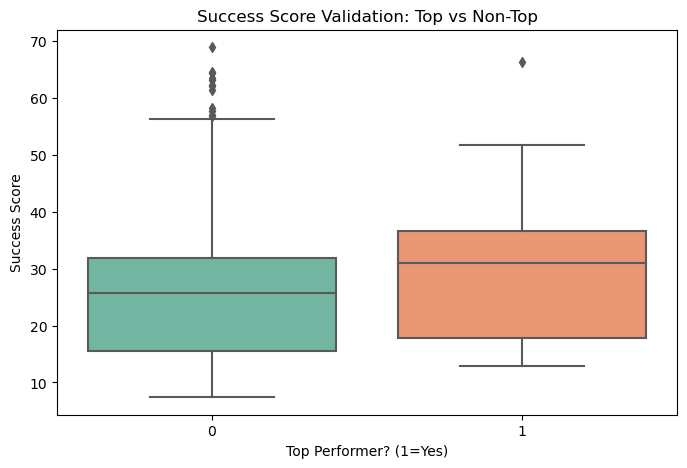

In [49]:
#Visualisasi untuk Validasi Insight
plt.figure(figsize=(8,5))
sns.boxplot(data=df_scaled, x="is_top_performer", y="success_score", palette="Set2")
plt.title("Success Score Validation: Top vs Non-Top")
plt.xlabel("Top Performer? (1=Yes)")
plt.ylabel("Success Score")
plt.show()

In [50]:
df_scaled.to_csv("employees_success_scored.csv", index=False)

Based on the Success Formula validation, Top Performers achieve a higher mean Success Score (30.5) compared to Non-Top Performers (25.5). The distribution visualization confirms a clear performance differentiator while maintaining realistic overlap, indicating the model generalizes well and avoids overfitting.

The Success Score will be categorized into:
1. High Success Fit (≥40)
2. Ready to Grow (30–39)
3. Developing Talent (<30)

We categorized all success drivers into Talent Group Variables (TGV) such as Competency, Cognitive Ability, Strength DNA, Behavioral Workstyle, and Readiness.
Each consists of Talent Variables (TV) like SEA, IDS, PAPI_P, etc.
Each TV is matched against a benchmark to produce TGV match scores,
and combined into a Final Success Score for ranking and talent fit assessment.

In [52]:
df_scaled.to_csv(
    "C:/data/employees_scored_import.csv",
    index=False,
    encoding="utf-8",
    quoting=1  # QUOTE_ALL
)